In [38]:
import requests~~~~

In [39]:
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns

In [42]:
from datetime import datetime

In [43]:
API_KEY = "bd5e378503939ddaee76f12ad7a97608"

In [44]:
cities = ['New York', 'London', 'Tokyo', 'Sydney', 'Mumbai']

In [45]:
def fetch_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    try:
        resp = requests.get(url, params=params)
        resp.raise_for_status()
        data = resp.json()
        return {
            'city': city,
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'pressure': data['main']['pressure'],
            'wind_speed': data['wind']['speed'],
            'weather_condition': data['weather'][0]['main'],
            'date': datetime.now().strftime('%Y-%m-%d')
        }
    except Exception as e:
        print(f"Failed for {city}: {e}")
        return None

In [46]:
weather_data = [fetch_weather(city, API_KEY) for city in cities]

In [47]:
weather_data = [w for w in weather_data if w]

In [48]:
df = pd.DataFrame(weather_data)

In [49]:
plt.style.use('seaborn-v0_8')

In [50]:
sns.set_palette("husl")

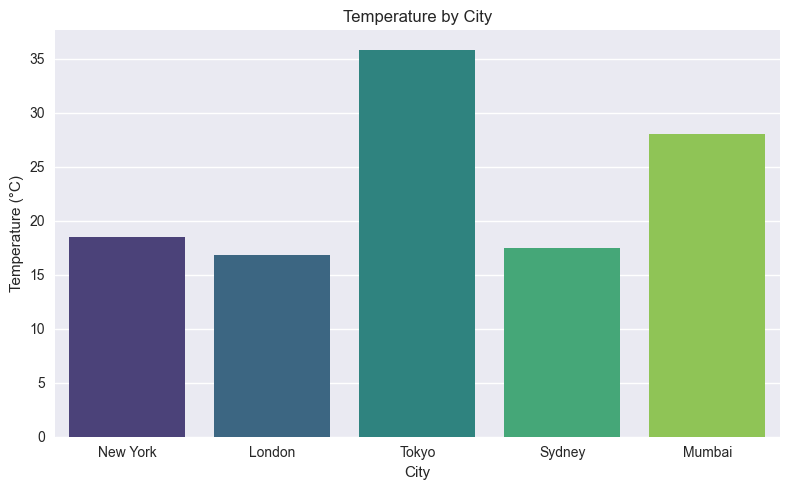

In [51]:
# 1. Temperature by City
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="city", y="temperature", hue="city", palette="viridis", dodge=False, legend=False)
plt.title("Temperature by City")
plt.ylabel("Temperature (°C)")
plt.xlabel("City")
plt.tight_layout()
plt.show()

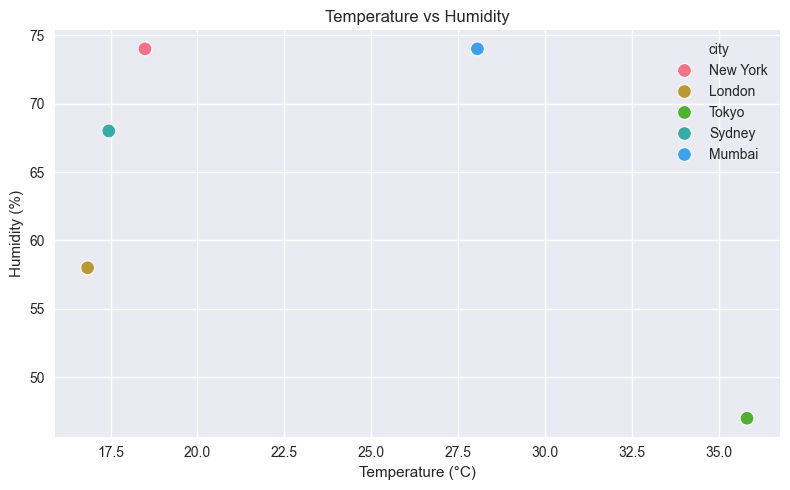

In [52]:
# 2. Temperature vs Humidity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="temperature", y="humidity", hue="city", s=100)
plt.title("Temperature vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()

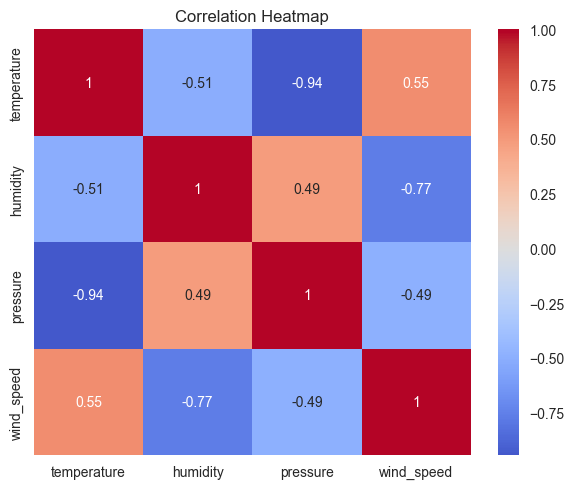

In [53]:
# 3. Correlation Heatmap
corr = df[["temperature", "humidity", "pressure", "wind_speed"]].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

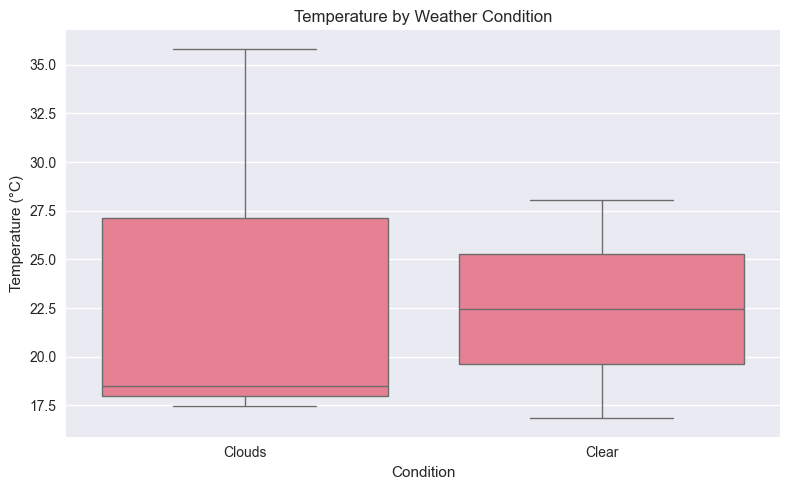

In [54]:
# 4. Temperature by Weather Condition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="weather_condition", y="temperature")
plt.title("Temperature by Weather Condition")
plt.ylabel("Temperature (°C)")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()